# Homework
1. Plot the training loss with different learning rates in linear model.
2. Plot the error surface linear model(axis x for $\mathbf{w}_1$, axis y for for $\mathbf{w}_2$, axis z for loss)
3. Design five input nodes and one output node linear model and plot the training loss.(train on train_X1 and train_y1)
4. Design ten input nodes and five output nodes linear model and plot the training loss.(train on train_X2 and train_y2)
5. Design one hundred input nodes and one output node linear model, then convert model from linear to nonlinear(like $y = b + \mathbf{w}_1\mathbf{x} + \mathbf{w}_2\mathbf{x}^2 + ... + \mathbf{w}_n\mathbf{x}^n $) and record the training loss in different power.(train on train_X3 and train_y3)

In [1]:
# run this before anything begins

%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pickle
import copy

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### 1. Plot the training loss with different learning rates in linear model.

epoch 1, loss 16.000080
epoch 2, loss 15.042070
epoch 3, loss 14.141588
epoch 4, loss 13.295182
epoch 5, loss 12.499588
epoch 6, loss 11.751751
epoch 7, loss 11.048801
epoch 8, loss 10.388027
epoch 9, loss 9.766894
epoch 10, loss 9.183011
epoch 1, loss 9.176229
epoch 2, loss 4.952450
epoch 3, loss 2.676165
epoch 4, loss 1.447982
epoch 5, loss 0.784452
epoch 6, loss 0.425539
epoch 7, loss 0.231126
epoch 8, loss 0.125687
epoch 9, loss 0.068445
epoch 10, loss 0.037335
epoch 1, loss 0.033473
epoch 2, loss 0.000123
epoch 3, loss 0.000051
epoch 4, loss 0.000051
epoch 5, loss 0.000051
epoch 6, loss 0.000051
epoch 7, loss 0.000051
epoch 8, loss 0.000051
epoch 9, loss 0.000051
epoch 10, loss 0.000051
epoch 1, loss 0.000052
epoch 2, loss 0.000051
epoch 3, loss 0.000054
epoch 4, loss 0.000052
epoch 5, loss 0.000051
epoch 6, loss 0.000053
epoch 7, loss 0.000054
epoch 8, loss 0.000052
epoch 9, loss 0.000051
epoch 10, loss 0.000053


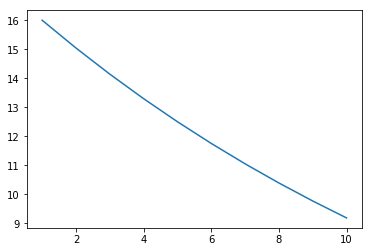

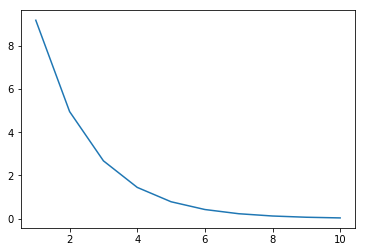

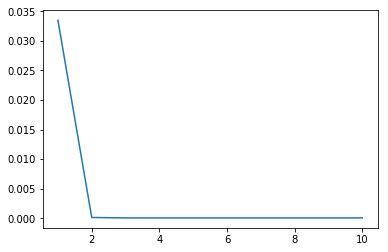

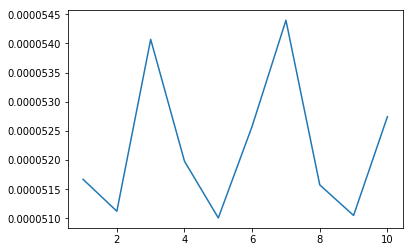

In [2]:
num_inputs = 2
num_examples = 1000
true_w = np.array([2, -3.4])
true_b = 4.2
features = np.random.normal(scale=1, size=(num_examples, num_inputs))
labels = np.dot(features, true_w) + true_b
labels += np.random.normal(scale=0.01, size=labels.shape)

batch_size = 10


###########################################################################################
# TODO

def reset():
    global w, b
    w = np.random.normal(scale=0.01, size=(num_inputs, 1))
    b = np.zeros(shape=(1,))

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis = 0), labels.take(j, axis = 0)

def linreg(X, w, b):
    return np.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(lr, batch_size, w_grad, b_grad):
    global w, b
    w = w - lr * w_grad / batch_size
    b = b - lr * b_grad / batch_size

net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

reset()

def train(num_epochs, lr):
    datas = []
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            y_hat = net(X, w, b)
            l = loss(y_hat, y)  # Minibatch loss in X and y
            w_grad = np.dot(X.T, (y_hat - y.reshape(y_hat.shape)))        
            b_grad = (y_hat - y.reshape(y_hat.shape)).sum()
            sgd(lr, batch_size, w_grad, b_grad)  # Update parameters using their gradient
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))
        datas.append(train_l.mean())
    return datas

plt.plot(list(range(1,11)),train(10, 0.0003))
plt.figure()
reset()
plt.plot(list(range(1,11)),train(10, 0.003))
plt.figure()
reset()
plt.plot(list(range(1,11)),train(10, 0.03))
plt.figure()
reset()
plt.plot(list(range(1,11)),train(10, 0.3))
###########################################################################################

### 2. Plot the error surface linear model(axis x for $\mathbf{w}_1$, axis y for for $\mathbf{w}_2$, axis z for loss)

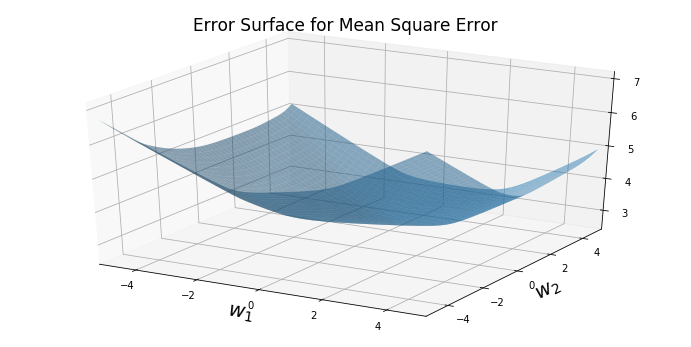

In [3]:
num_inputs = 2
num_examples = 1000
true_w = np.array([2, -3.4])
true_b = 4.2
features = np.random.normal(scale=1, size=(num_examples, num_inputs))
labels = np.dot(features, true_w) + true_b
labels += np.random.normal(scale=0.01, size=labels.shape)

def get_least_square_loss(X, y, w, b):
   
    total_loss = 0.0
    for i in range(X.shape[0]):
        x_i = X[i,:]
        z = w.dot(x_i) + b
        ###########################################################################################
        # TODO
        total_loss += 1/2 * np.linalg.norm(x_i - z)
        ###########################################################################################
    return total_loss / X.shape[0]
    
def plot_error_surface(X, y):
    NX = 50
    NY = 50

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim3d([-5, 5.0])
    ax.set_ylim3d([-5, 5.0])
    ax.set_xlabel('$w_1$', size=20)
    ax.set_ylabel('$w_2$', size=20)
   
    xs = np.linspace(-5, 5, NX)
    ys = np.linspace(-5, 5, NY)
    xv, yv = np.meshgrid(xs, ys)
    
    w_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)
    losses = []
    for i in range(w_fake.shape[0]):   
        losses.append(get_least_square_loss(X, y, w_fake[i,:], true_b))  
    losses = np.array(losses)
    ax.set_title('Error Surface for Mean Square Error', fontsize=17)    
    ax.plot_surface(xv, yv, losses.reshape(NX, NY), alpha=0.5)

for X, y in data_iter(batch_size, features, labels):
    plot_error_surface(X, y)
    break

### 3. Design five input nodes and one output node linear model and plot the training loss.(train on train_X1 and train_y1)

epoch 1, loss 1.278185
epoch 2, loss 1.259518
epoch 3, loss 1.242785
epoch 4, loss 1.229005
epoch 5, loss 1.215326
epoch 6, loss 1.203862
epoch 7, loss 1.194185
epoch 8, loss 1.184643
epoch 9, loss 1.176828
epoch 10, loss 1.169402
epoch 11, loss 1.163411
epoch 12, loss 1.157036
epoch 13, loss 1.152061
epoch 14, loss 1.147386
epoch 15, loss 1.143259
epoch 16, loss 1.139576
epoch 17, loss 1.136244
epoch 18, loss 1.133556
epoch 19, loss 1.130592
epoch 20, loss 1.128116
epoch 21, loss 1.125899
epoch 22, loss 1.124205
epoch 23, loss 1.122145
epoch 24, loss 1.120816
epoch 25, loss 1.119029
epoch 26, loss 1.118068
epoch 27, loss 1.116710
epoch 28, loss 1.115403
epoch 29, loss 1.114625
epoch 30, loss 1.113483
epoch 31, loss 1.112771
epoch 32, loss 1.111869
epoch 33, loss 1.111187
epoch 34, loss 1.110538
epoch 35, loss 1.110083
epoch 36, loss 1.109952
epoch 37, loss 1.109031
epoch 38, loss 1.108492
epoch 39, loss 1.108021
epoch 40, loss 1.107690
epoch 41, loss 1.107638
epoch 42, loss 1.107404
e

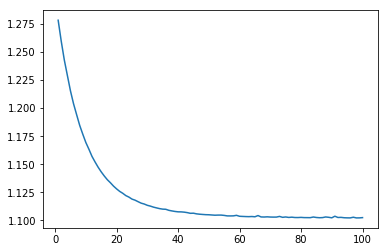

In [4]:
num_inputs = 5
num_examples = 1000
w = np.random.normal(scale=0.01, size=(num_inputs, 1))
b = np.zeros(shape=(1,))
features = np.array(pickle.load(open("train_X1.pkl", "rb")))
labels = np.array(pickle.load(open("train_y1.pkl", "rb")))
###########################################################################################
# TODO
    
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis = 0), labels.take(j, axis = 0)

def linreg(X, w, b):
    return np.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(lr, batch_size, w_grad, b_grad):
    global w, b
    w = w - lr * w_grad / batch_size
    b = b - lr * b_grad / batch_size

net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

reset()

def train(num_epochs, lr):
    datas = []
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            y_hat = net(X, w, b)
            l = loss(y_hat, y)  # Minibatch loss in X and y
            w_grad = np.dot(X.T, (y_hat - y.reshape(y_hat.shape)))        
            b_grad = (y_hat - y.reshape(y_hat.shape)).sum()
            sgd(lr, batch_size, w_grad, b_grad)  # Update parameters using their gradient
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))
        datas.append(train_l.mean())
    return datas

plt.plot(list(range(1,101)),train(100, 0.008))
###########################################################################################

pickle.dump(w, open("weights1.pkl", "wb"))
pickle.dump(b, open("bias1.pkl", "wb"))

In [5]:
""" I will use your trained weights to do testing """
w1 = np.array(pickle.load(open("weights1.pkl", "rb")))
b1 = np.array(pickle.load(open("bias1.pkl", "rb")))
test_X = np.array(pickle.load(open("test_X1.pkl", "rb")))
test_y = np.array(pickle.load(open("test_y1.pkl", "rb")))
test_l = loss(net(test_X, w1, b1), test_y) 
print("test loss: %f" % (test_l.mean()))

FileNotFoundError: [Errno 2] No such file or directory: 'test_X1.pkl'

### 4. Design ten input nodes and five output nodes linear model and plot the training loss.(train on train_X2 and train_y2)

epoch 1, loss 2.174735
epoch 2, loss 1.577120
epoch 3, loss 1.451044
epoch 4, loss 1.423160
epoch 5, loss 1.417161
epoch 6, loss 1.415815
epoch 7, loss 1.415711
epoch 8, loss 1.415259
epoch 9, loss 1.415225
epoch 10, loss 1.415273
epoch 11, loss 1.415313
epoch 12, loss 1.415430
epoch 13, loss 1.415257
epoch 14, loss 1.415101
epoch 15, loss 1.415191
epoch 16, loss 1.415329
epoch 17, loss 1.415526
epoch 18, loss 1.415193
epoch 19, loss 1.415446
epoch 20, loss 1.415376
epoch 21, loss 1.415356
epoch 22, loss 1.415302
epoch 23, loss 1.415344
epoch 24, loss 1.415298
epoch 25, loss 1.415229
epoch 26, loss 1.415371
epoch 27, loss 1.415411
epoch 28, loss 1.415418
epoch 29, loss 1.415274
epoch 30, loss 1.415273
epoch 31, loss 1.415771
epoch 32, loss 1.415180
epoch 33, loss 1.415504
epoch 34, loss 1.415199
epoch 35, loss 1.415419
epoch 36, loss 1.415394
epoch 37, loss 1.415325
epoch 38, loss 1.415563
epoch 39, loss 1.415354
epoch 40, loss 1.415260
epoch 41, loss 1.415140
epoch 42, loss 1.415547
e

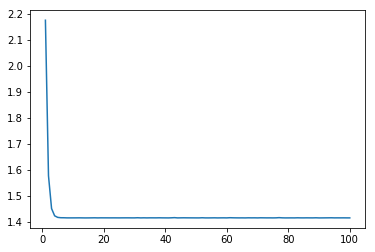

In [6]:
num_inputs = 10
num_outputs = 5
num_examples = 1000
w = np.random.normal(scale=0.01, size=(num_inputs, num_outputs))
b = np.zeros(shape=(1,))
features = np.array(pickle.load(open("train_X2.pkl", "rb")))
labels = np.array(pickle.load(open("train_y2.pkl", "rb")))
###########################################################################################
# TODO
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis = 0), labels.take(j, axis = 0)

def linreg(X, w, b):
    #print(np.shape(X),np.shape(w))
    return np.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(lr, batch_size, w_grad, b_grad):
    global w, b
    w = w - lr * w_grad / batch_size
    b = b - lr * b_grad / batch_size

net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2


def train(num_epochs, lr):
    datas = []
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            #print(np.shape(X),np.shape(y))
            y_hat = net(X, w, b)
            #print(np.shape(y_hat))
            l = loss(y_hat, y)  # Minibatch loss in X and y
            w_grad = np.dot(X.T, (y_hat - y.reshape(y_hat.shape)))        
            b_grad = (y_hat - y.reshape(y_hat.shape)).sum()
            sgd(lr, batch_size, w_grad, b_grad)  # Update parameters using their gradient
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))
        datas.append(train_l.mean())
    return datas

plt.plot(list(range(1,101)),train(100, 0.008))
###########################################################################################
pickle.dump(w, open("weights2.pkl", "wb"))
pickle.dump(b, open("bias2.pkl", "wb"))

In [7]:
""" I will use your trained weights to do testing """
w2 = np.array(pickle.load(open("weights2.pkl", "rb")))
b2 = np.array(pickle.load(open("bias2.pkl", "rb")))
test_X = np.array(pickle.load(open("test_X2.pkl", "rb")))
test_y = np.array(pickle.load(open("test_y2.pkl", "rb")))
test_l = loss(net(test_X, w2, b2), test_y) 
print("test loss: %f" % (test_l.mean()))

FileNotFoundError: [Errno 2] No such file or directory: 'test_X2.pkl'

### 5. Design one hundred input nodes and one output node linear model, then convert model from linear to nonlinear(like $y = b + \mathbf{w}_1\mathbf{x} + \mathbf{w}_2\mathbf{x}^2 + ... + \mathbf{w}_n\mathbf{x}^n $) and record the training loss in different power.(train on train_X3 and train_y3)

epoch 1, loss 3.664857
epoch 2, loss 3.509172
epoch 3, loss 3.504435
epoch 4, loss 3.225350
epoch 5, loss 3.137055
epoch 6, loss 3.018681
epoch 7, loss 2.869692
epoch 8, loss 2.761603
epoch 9, loss 2.691914
epoch 10, loss 2.577002
epoch 11, loss 2.587021
epoch 12, loss 2.394304
epoch 13, loss 2.311867
epoch 14, loss 2.285340
epoch 15, loss 2.168696
epoch 16, loss 2.109862
epoch 17, loss 2.042164
epoch 18, loss 2.061893
epoch 19, loss 1.949719
epoch 20, loss 1.887129
epoch 21, loss 1.856767
epoch 22, loss 1.795690
epoch 23, loss 1.762979
epoch 24, loss 1.730353
epoch 25, loss 1.672781
epoch 26, loss 1.641135
epoch 27, loss 1.594407
epoch 28, loss 1.566469
epoch 29, loss 1.537354
epoch 30, loss 1.506523
epoch 31, loss 1.475322
epoch 32, loss 1.449940
epoch 33, loss 1.434246
epoch 34, loss 1.404741
epoch 35, loss 1.426144
epoch 36, loss 1.402203
epoch 37, loss 1.343965
epoch 38, loss 1.344543
epoch 39, loss 1.305668
epoch 40, loss 1.295829
epoch 41, loss 1.283820
epoch 42, loss 1.259413
e

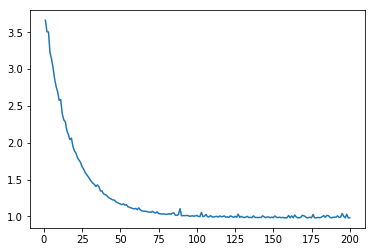

In [8]:
num_inputs = 100
num_examples = 1000

train_X3 = np.array(pickle.load(open("train_X3.pkl", "rb")))
train_y3 = np.array(pickle.load(open("train_y3.pkl", "rb")))
#test_X3 = np.array(pickle.load(open("test_X3.pkl", "rb")))
#test_y3 = np.array(pickle.load(open("test_y3.pkl", "rb")))

features = train_X3
labels = train_y3



batch_size = 10
poly_power_list = [1, 10, 100, 1000] # change this can get different result
lr = 0.005
num_epochs = 200
###########################################################################################
# TODO
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis = 0), labels.take(j, axis = 0)

def linreg(X, w, b):
    #print(np.shape(X),np.shape(w))
    return np.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(lr, batch_size, w_grad, b_grad):
    global w, b
    w = w - lr * w_grad / batch_size
    b = b - lr * b_grad / batch_size

net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2


def train(num_epochs, lr, power = 1):
    datas = []
    global w, b
    w = np.random.normal(scale=0.01, size=(num_inputs*power, 1)) 
    b = np.zeros(shape=(1,))
    
    features_S = np.zeros((num_examples,1))
        
    tmp = copy.deepcopy(features)
    for i in range(power):
        features_S = np.hstack((features_S, tmp))
        tmp *= features
    features_S = np.delete(features_S,0,1)
    
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            
            F = np.zeros((batch_size,1))
            for i in range(power):
                F = np.hstack((F,X))
                X *= X
                
            F = np.delete(F,0,1)
            
            
            #print(np.shape(F))
            y_hat = net(F, w, b)
            #print(np.shape(y_hat))
            l = loss(y_hat, y)  # Minibatch loss in X and y
            w_grad = np.dot(F.T, (y_hat - y.reshape(y_hat.shape)))        
            b_grad = (y_hat - y.reshape(y_hat.shape)).sum()
            sgd(lr, batch_size, w_grad, b_grad)  # Update parameters using their gradient
        
        train_l = loss(net(features_S, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))
        datas.append(train_l.mean())
    return datas

plt.plot(list(range(1,201)),train(num_epochs, lr, power=1))
#plt.plot(list(range(1,201)),train(num_epochs, lr, power=10))
#plt.plot(list(range(1,201)),train(num_epochs, lr, power=100))
#plt.plot(list(range(1,201)),train(num_epochs, lr, power=1000))
###########################################################################################